# Lab 02. Linear regression, Pandas

*Лаба взята из курса по машинному обучению ФКН ВШЭ за 2016 год.*


### Сроки сдачи лабы

Дата выдачи: 21.09.2016

Крайняя дата сдачи: 05.10.2016

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 


### Материалы
* [Learn Pandas](https://bitbucket.org/hrojas/learn-pandas)
* [Data Exploration using Pandas](https://drive.google.com/file/d/0B8JWjGrFNNkHdzJzVHlfODJQbFk/view)


## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import time
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [2]:
def max_element(arr):
    pos_zero = (arr == 0) # Позиции нулей
    pos_elem = np.concatenate(([False], pos_zero))[:-1] # Маска выделяющая элементы, перед которыми стоит 0
    max_elem = arr[pos_elem].max()
    return max_elem
    
arr = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(max_element(arr))

5


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [3]:
def nearest_value(X, v):
    X_flat = X.flatten() # Распрямляем матрицу
    pos_closest = abs(X_flat - v).argmin() # Находим позицию ближайшего элемента к v
    return X_flat[pos_closest]

X = np.arange(0,10).reshape((2, 5))
v = 7.1
print(nearest_value(X, v))

7


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [4]:
def scale(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    assert 0.0 not in std # Проверяем чтобы не было нулевых стандартных отклонений
    return (X - mean) / std

X = np.random.randint(1, 100, size=(5,5))
scale(X)

array([[ 1.1234064 , -0.24299023, -0.26568609,  0.80178981, -0.46639925],
       [ 0.02277175,  0.84061484,  0.7627762 , -0.23144448,  0.02627601],
       [-0.05313409,  1.00479743,  0.7199236 ,  1.21508353,  1.76706196],
       [ 0.70592429, -1.78630654,  0.63421841, -1.67797249, -1.2875247 ],
       [-1.79896836,  0.1838845 , -1.85123212, -0.10745637, -0.03941402]])

**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [5]:
def get_stats(X):
    det = np.linalg.det(X) # Определитель
    tr = np.trace(X) # След
    min_elem = np.min(X) # Минимальный элемент
    max_elem = np.max(X) # Максимальный элемент
    norm = np.linalg.norm(X, ord='fro') # Норма Фробениуса
    eigenvalues = np.linalg.eigvals(X) # Собственные числа
    inv = np.linalg.inv(X) # Обратная матрица
    stats = [det, tr, min_elem, max_elem, norm, eigenvalues, inv]
    return stats

mu, sigma = 10, 1
X = np.random.normal(mu, sigma, size=(5, 5))
print(*get_stats(X), sep='\n\n')

186.478587559

49.8729200757

8.26193812986

12.2073625731

51.2016640358

[ 50.98527034+0.j          -0.14798158+1.6728554j   -0.14798158-1.6728554j
  -0.40819356+1.06311123j  -0.40819356-1.06311123j]

[[ -1.04309340e-01  -7.35963930e-04   6.40065344e-01  -6.81493195e-01
    1.87591962e-01]
 [ -2.83272590e-01   9.72371568e-02   2.95129386e-01   6.71542242e-02
   -1.42225161e-01]
 [  1.40038222e-01  -3.92520714e-01   2.12000437e-01  -1.53169547e-01
    2.04767950e-01]
 [  4.82247267e-02   2.04380191e-01   1.31513800e+00  -1.11454919e+00
   -4.18142673e-01]
 [  2.15376850e-01   1.16348120e-01  -2.57248481e+00   2.02098048e+00
    1.94769380e-01]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [6]:
max_elem = [] # Список максимальных элементов
for exp_num in range(100):
    A = np.random.normal(size=(10,10))
    B = np.random.normal(size=(10,10))
    C = np.dot(A, B)
    max_elem.append(C.max())
    
print("Cреднее значение по экспериментам у максимальных элементов: %f" % np.mean(max_elem))
print("95-процентная квантиль: %f" % np.percentile(max_elem, 95))

Cреднее значение по экспериментам у максимальных элементов: 8.362620
95-процентная квантиль: 11.375448


### Pandas

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

При отсылке лабы сами данные отправлять не нужно.

In [7]:
import pandas as pd
%matplotlib inline

In [8]:
data = pd.read_csv('2008.csv')
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [9]:
data.CancellationCode.describe()

count     1411
unique       3
top          A
freq       563
Name: CancellationCode, dtype: object

Самой частой причиной отмены рейса была A = carrier

**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [10]:
print("Среднее расстояние: %f" % data['Distance'].mean())
print("Минимальное расстояние: %f" % data['Distance'].min())
print("Максимальное расстояние: %f" % data['Distance'].max())

Среднее расстояние: 724.508257
Минимальное расстояние: 31.000000
Максимальное расстояние: 4962.000000


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [11]:
# Рейсы, для которых зафиксировано минимальное расстояние

min_dist = data[data['Distance'] == data['Distance'].min()]
min_dist.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1116,2008,12,30,2,1123.0,1007,1148.0,1033,AS,65,...,6.0,6.0,0,NaN,0,0.0,75.0,0.0,0.0,0.0
6958,2008,12,26,5,NaN,1007,NaN,1033,AS,65,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
17349,2008,8,18,1,NaN,1737,NaN,1801,AS,64,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
27534,2008,3,11,2,1611.0,1537,1630.0,1605,AS,64,...,4.0,5.0,0,NaN,0,0.0,25.0,0.0,0.0,0.0
46082,2008,8,9,6,1103.0,1036,1139.0,1100,AS,65,...,4.0,24.0,0,NaN,0,0.0,0.0,12.0,0.0,27.0


In [12]:
# Дни и рейсы

min_dist[['DayofMonth', 'FlightNum']]

,DayofMonth,FlightNum
1116,30,65
6958,26,65
17349,18,64
27534,11,64
46082,9,65
48112,28,64


In [13]:
# Расстояния, которые были пройдены на рейсах 64 и 65

data[(data['FlightNum'] == 64) | (data['FlightNum'] == 65)].Distance.unique()

array([ 533,   31,  680, 2381,   82, 1005,  123,  359, 1747,  571,  372,
       2454,  581,  883,  281,  682,  414,  386], dtype=int64)

**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [14]:
data['Origin'].describe()

count     70000
unique      297
top         ATL
freq       4134
Name: Origin, dtype: object

In [15]:
# Больше всего вылетов произведено из аэропорта "William B Hartsfield-Atlanta Intl", который расположен городе Атланта

airports = pd.read_csv('airports.csv')
airports[airports['iata'] == "ATL"][['airport', 'city']]

,airport,city
880,William B Hartsfield-Atlanta Intl,Atlanta


**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [16]:
good_flight = data[data['Cancelled'] == 0] # Вылетевшие рейсы

# Среднее время полета для каждого аэропорта по всем вылетевшим рейсам
av_time = good_flight.groupby('Origin').mean()['AirTime'] 
av_time

Origin
ABE     88.266667
ABI     36.400000
ABQ     93.454321
ABY     35.714286
ACK     50.800000
ACT     28.521739
ACV     55.606061
ACY    113.500000
ADK    142.000000
ADQ     42.666667
AEX     69.314286
AGS     35.000000
AKN     48.000000
ALB    102.347826
ALO     34.666667
AMA     56.474359
ANC    165.415094
ASE     46.234043
ATL     93.010084
ATW     56.571429
AUS    102.662921
AVL     75.487805
AVP     96.413793
AZO     34.703704
BDL    115.602837
BET     56.583333
BFL     57.040816
BGM     67.888889
BGR     84.176471
BHM     79.177215
          ...    
SNA    107.233333
SPI     56.454545
SPS     30.000000
SRQ    105.213333
STL     99.070400
STT    185.029412
STX    153.000000
SUN     47.230769
SUX     45.750000
SWF    139.636364
SYR     89.701389
TEX     97.500000
TLH     57.121212
TOL     50.733333
TPA    116.484472
TRI     49.200000
TUL     82.910256
TUS     90.564854
TVC     50.636364
TWF     39.708333
TXK     45.333333
TYR     30.000000
TYS     70.660131
VLD     48.181818
VPS

In [17]:
# Наибольшее значение этого показателя имеет аэропорт EWR

av_time.sort_values().dropna().tail(1)

Origin
SJU    205.2
Name: AirTime, dtype: float64

In [18]:
airports[airports['iata'] == "EWR"][['airport', 'city']]

,airport,city
1436,Newark Intl,Newark


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [24]:
good_data = data.groupby('Origin').filter(lambda x: x['FlightNum'].count() > 1000) # Исключим аэропорты, которые совершили менее 1000 рейсов
all_flights = good_data.groupby('Origin').count().FlightNum # Аэропорты и количество рейсов, которые они совершили
dep_data = good_data[(good_data.DepDelay > 0)].groupby('Origin').count().FlightNum # Рейсы с задержкой
ratio = dep_data / all_flights # Доли задержаных рейсов по аэропортам
max_dep = ratio.max() # Максимальная доля задержанных рейсов
dep_data[ratio == max_dep]

Origin
EWR    710
Name: FlightNum, dtype: int64

In [25]:
# Аэропорт, у которого наибольшая доля задержек

airports[airports['iata'] == "EWR"][['airport', 'city']]

,airport,city
1436,Newark Intl,Newark


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [26]:
# Посмотрим в каких столбцах есть NaN

pd.isnull(data).any()

Year                 False
Month                False
DayofMonth           False
DayOfWeek            False
DepTime               True
CRSDepTime           False
ArrTime               True
CRSArrTime           False
UniqueCarrier        False
FlightNum            False
TailNum               True
ActualElapsedTime     True
CRSElapsedTime        True
AirTime               True
ArrDelay              True
DepDelay              True
Origin               False
Dest                 False
Distance             False
TaxiIn                True
TaxiOut               True
Cancelled            False
CancellationCode      True
Diverted             False
CarrierDelay          True
WeatherDelay          True
NASDelay              True
SecurityDelay         True
LateAircraftDelay     True
dtype: bool

In [27]:
print("Всего пропущенных знаений: %d" %(len(data) - data.count()).sum())

Всего пропущенных знаений: 355215


In [28]:
print('%d объектов имеют хотя бы один пропуск' %pd.isnull(data).any(1).sum())

70000 объектов имеют хотя бы один пропуск


In [29]:
print('%d признаков имеют хотя бы одно пропущенное значение' %(pd.isnull(data).any().sum()))

16 признаков имеют хотя бы одно пропущенное значение


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [30]:
# Наличие пропусков в целевой переменной

data.DepDelay.isnull().any()

True

In [31]:
data[data.DepDelay.isnull()].head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
194,2008,1,28,1,NaN,1640,NaN,1719,UA,753,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
204,2008,6,13,5,NaN,1229,NaN,1421,OH,5765,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
236,2008,7,19,6,NaN,544,NaN,917,OO,6151,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
257,2008,4,19,6,NaN,1345,NaN,1435,AA,1853,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
267,2008,9,23,2,NaN,1400,NaN,1515,WN,2049,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


Отметим, что все рейсы, которые отменялись (Cancelled=1) в поле DepDelay имеют пропущенные значения, поэтому это поле можно удалить.

In [95]:
data[data.DepDelay.isnull()].Cancelled.unique()

array([1], dtype=int64)

Также можно удалить поля, у которых больше половины значений пропущены

In [32]:
data.count() > 35000

Year                  True
Month                 True
DayofMonth            True
DayOfWeek             True
DepTime               True
CRSDepTime            True
ArrTime               True
CRSArrTime            True
UniqueCarrier         True
FlightNum             True
TailNum               True
ActualElapsedTime     True
CRSElapsedTime        True
AirTime               True
ArrDelay              True
DepDelay              True
Origin                True
Dest                  True
Distance              True
TaxiIn                True
TaxiOut               True
Cancelled             True
CancellationCode     False
Diverted              True
CarrierDelay         False
WeatherDelay         False
NASDelay             False
SecurityDelay        False
LateAircraftDelay    False
dtype: bool

In [33]:
drop_col = ['Cancelled', 'CancellationCode', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CarrierDelay']

data = data.drop(drop_col, 1)
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,65.0,46.0,8.0,16.0,MDW,CLE,307,3.0,8.0,0
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,138.0,108.0,2.0,16.0,IAH,AVL,834,4.0,12.0,0
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,155.0,125.0,-19.0,-2.0,MDW,TPA,997,4.0,9.0,0
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,111.0,79.0,-12.0,-3.0,SLC,FCA,532,4.0,19.0,0
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,160.0,136.0,-17.0,-5.0,LAS,AUS,1090,4.0,8.0,0


Удалим объекты, у которых значение целевой переменной NaN или 0

In [34]:
len(data[(~data.DepDelay.isnull()) & (data.DepDelay != 0.0)])

63404

Преобразуем данные: целевую переменную выносим из фрейма

In [35]:
data = data[(~data.DepDelay.isnull()) & (data.DepDelay != 0.0)]
target = data.DepDelay
data = data.drop('DepDelay', 1)
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,57.0,65.0,46.0,8.0,MDW,CLE,307,3.0,8.0,0
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,124.0,138.0,108.0,2.0,IAH,AVL,834,4.0,12.0,0
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,138.0,155.0,125.0,-19.0,MDW,TPA,997,4.0,9.0,0
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,102.0,111.0,79.0,-12.0,SLC,FCA,532,4.0,19.0,0
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,148.0,160.0,136.0,-17.0,LAS,AUS,1090,4.0,8.0,0


**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [36]:
# Напополнение нанов значением np.nan

data = data.fillna(value=np.nan)

In [37]:
def time_features(data, columns):
    '''
    Date splitting by hours and minutes
    '''
    features = pd.DataFrame() # Создаем датафрейм для новых признаков
    for col in columns:
        date = data[col].apply(lambda x: np.nan if str(x) == 'nan' 
                                           else (4 - len(str(round(x)))) * '0' + str(round(x))) # Добиваем нулями
        minute = date.apply(lambda x: np.nan if str(x) == 'nan' else int(x[2:])) # Столбец с минутами
        hour = date.apply(lambda x: np.nan if str(x) == 'nan' else int(x[:2])) # Столбец с часами
        # Заполняем датафрейм полученными признаками
        features[col + '_Hour'] = hour
        features[col + '_Minute'] = minute
    return features

Преобразуем временные признаки

In [38]:
columns = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']
f = time_features(data, columns)
f.head()

,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,21,11,20,55,23.0,8.0,23,0
1,14,26,14,10,17.0,30.0,17,28
2,11,43,11,45,15.0,1.0,15,20
3,11,41,11,44,13.0,23.0,13,35
4,8,15,8,20,12.0,43.0,13,0


Заменим старые признаки ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime'] на полученные после разделения

In [39]:
data = data.drop(columns, 1)
data = pd.concat((data, f), axis=1)

In [40]:
data.head()

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,TaxiOut,Diverted,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,...,8.0,0,21,11,20,55,23.0,8.0,23,0
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,...,12.0,0,14,26,14,10,17.0,30.0,17,28
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,...,9.0,0,11,43,11,45,15.0,1.0,15,20
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,...,19.0,0,11,41,11,44,13.0,23.0,13,35
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,...,8.0,0,8,15,8,20,12.0,43.0,13,0


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

Вычислим корреляцию признаков с целевой переменной

In [41]:
for col in data.columns:
    try:
        corr = np.corrcoef(data[col].fillna(value=0),target)[0,1]
    except TypeError:
        continue
    print("Корреляция DepDelay с признаком %s: %f" %(col, corr))

Корреляция DepDelay с признаком Year: nan
Корреляция DepDelay с признаком Month: -0.029528
Корреляция DepDelay с признаком DayofMonth: 0.008574
Корреляция DepDelay с признаком DayOfWeek: 0.008530
Корреляция DepDelay с признаком FlightNum: 0.021166
Корреляция DepDelay с признаком ActualElapsedTime: 0.039257
Корреляция DepDelay с признаком CRSElapsedTime: 0.034212
Корреляция DepDelay с признаком AirTime: 0.023060
Корреляция DepDelay с признаком ArrDelay: 0.929827
Корреляция DepDelay с признаком Distance: 0.024252
Корреляция DepDelay с признаком TaxiIn: 0.018613
Корреляция DepDelay с признаком TaxiOut: 0.101287
Корреляция DepDelay с признаком Diverted: 0.027166
Корреляция DepDelay с признаком DepTime_Hour: 0.203125
Корреляция DepDelay с признаком DepTime_Minute: -0.017055
Корреляция DepDelay с признаком CRSDepTime_Hour: 0.140084
Корреляция DepDelay с признаком CRSDepTime_Minute: 0.022437
Корреляция DepDelay с признаком ArrTime_Hour: 0.065438
Корреляция DepDelay с признаком ArrTime_Minute:

Как видно, целевая переменная сильно кореллирует (~0.93) с признаком ArrDelay (задержка прибытия).
С каждым из признаков DepTime_Hour, DepTime_Minute, CRSDepTime_Hour, CRSDepTime_Minute (фактическое время отправления и по расписанию) целевая переменная слабо коррелируюет. Однако, очевидно, что зная эти признаки можно точно восстановить значения целевой переменной. Поэтому, кроме ArrDelay, исключим из выборки и эти признаки, а также признаки, которые упоминаются в задании.

In [42]:
drop_feat = ['ArrDelay', 'DepTime_Hour', 'DepTime_Minute', 'CRSDepTime_Hour', 'CRSDepTime_Minute', 'TailNum', 'Year']
#drop_feat = ['ArrDelay', 'TailNum', 'Year']

data = data.drop(drop_feat, 1)

In [43]:
data.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,6,18,3,WN,242,57.0,65.0,46.0,MDW,CLE,307,3.0,8.0,0,23.0,8.0,23,0
1,6,4,3,XE,2380,124.0,138.0,108.0,IAH,AVL,834,4.0,12.0,0,17.0,30.0,17,28
2,8,3,7,WN,1769,138.0,155.0,125.0,MDW,TPA,997,4.0,9.0,0,15.0,1.0,15,20
3,1,23,3,OO,3802,102.0,111.0,79.0,SLC,FCA,532,4.0,19.0,0,13.0,23.0,13,35
4,5,4,7,WN,399,148.0,160.0,136.0,LAS,AUS,1090,4.0,8.0,0,12.0,43.0,13,0


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

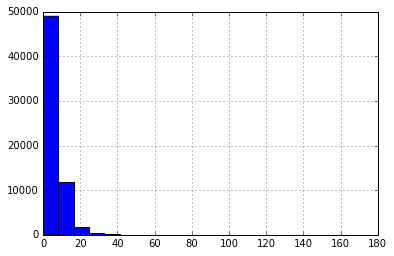

In [44]:
data['TaxiIn'].hist(bins=20)

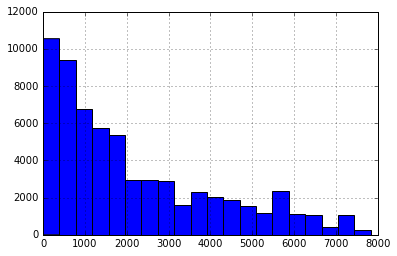

In [45]:
data['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Данные имеют "скошенное" распределение, поэтому масштабирование позволит снизить данную ассиметрию в данных.

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [49]:
# Для подавления предупреждений
import warnings
warnings.filterwarnings('ignore')

# Для масштабирования
from sklearn.preprocessing import StandardScaler

In [47]:
def transform_data(data):
    X = data
    numerical_columns = [c for c in X.columns if X[c].dtype.name != 'object']
    categorical_columns = [c for c in X.columns if X[c].dtype.name == 'object']
    
    # Заполнение пропущенных значений
    for c in numerical_columns:
        X[c] = X[c].fillna(value=0)   
    for c in categorical_columns:
        X[c] = X[c].fillna(value='nan')
    
    # Масштабирование вещественных признаков
    for c in numerical_columns:
        X[c] = StandardScaler().fit_transform(X[c])
       
    # One-hot кодирование категориальных признаков
    categorical_data = pd.get_dummies(X[categorical_columns])
    
    # Объединяем всё в одну таблицу
    X = X.drop(categorical_columns, axis=1)
    X = pd.concat((X, categorical_data), axis=1)
    
    # Возвращаем полученный датасет
    return X

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [50]:
X = transform_data(data)
X.head()

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
0,-0.118281,0.256485,-0.462767,-0.991600,-0.988979,-0.916826,-0.849307,-0.744130,-0.786908,-0.741204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.118281,-1.332050,-0.462767,0.106546,-0.040552,0.127377,0.064301,0.183961,-0.582387,-0.389769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.467662,-1.445517,1.541454,-0.207284,0.157627,0.370547,0.314806,0.471018,-0.582387,-0.653345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.583137,0.823819,-0.462767,0.836931,-0.351976,-0.258835,-0.363032,-0.347886,-0.582387,0.225242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.411252,-1.332050,1.541454,-0.910960,0.299183,0.442068,0.476898,0.634799,-0.582387,-0.741204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


После преобразования получаем 629 признаков

In [51]:
X.shape

(63404, 629)

Такое увеличение числа признаков обусловлено тем, что категориальные признаки имеют большое количество уникальных значений. Например, в результате кодирования признака Dest получаем 298 новых признаков.

In [52]:
len(data.Dest.unique())

298

**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [54]:
from sklearn.cross_validation import train_test_split

Случайно разбиваем выборку с random_state=2016.

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.30, random_state=2016)
X_train.shape, X_test.shape

((44382, 629), (19022, 629))

In [56]:
X_train.head()

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
6834,-1.583137,1.050753,0.539343,0.340248,-0.734178,-0.745177,-0.613537,-0.707147,-0.582387,-0.653345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46238,1.346576,0.710352,1.040399,-0.420955,0.016071,0.155985,0.137979,0.134651,-0.377866,-0.565486,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3554,-1.583137,-0.197382,-1.464878,-1.086109,-0.351976,-0.487702,-0.598801,-0.575066,3.712557,-0.214051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37224,-1.583137,-1.332050,0.539343,-0.154380,-0.875734,-0.859610,-0.878778,-0.747652,-0.786908,0.137384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13625,0.174690,0.029551,-0.462767,0.225708,-0.224575,-0.173010,-0.510388,-0.222849,-0.582387,1.894558,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

Строим модель и обучаем ее на 1000 объектах исходной выборки

In [61]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train[:1000], y_train[:1000])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred_1000 = lr.predict(X_train[:1000])
y_pred = lr.predict(X_train)
print("Коэффициент дерминации на подвыборке: %f" %r2_score(y_train[:1000], y_pred_1000))
print("Среднеквадратичная ошибка на подвыборке: %f" %mean_squared_error(y_train[:1000], y_pred_1000))
print("Коэффициент дерминации на обучающей выборке: %f" %r2_score(y_train, y_pred))
print("Среднеквадратичная ошибка на обучающей выборке: %f" %mean_squared_error(y_train, y_pred))

Коэффициент дерминации на подвыборке: 0.103924
Среднеквадратичная ошибка на подвыборке: 1125.354523
Коэффициент дерминации на обучающей выборке: 0.072701
Среднеквадратичная ошибка на обучающей выборке: 1186.524550


Как видно, модель показывает низкое качество обучения. По полученым коэффициентам детерминации можно сделать вывод, что модель не является приемлемой (модель можно считать приемлемой при коэффиценте детерминации >0.5. [ссылка](https://ru.wikipedia.org/wiki/Коэффициент_детерминации))

In [64]:
lr.coef_

array([ -1.28309133e+00,   2.99694644e-01,   2.28212029e-01,
         1.06224170e+00,   1.58719141e+01,   6.88931720e+00,
        -1.64881180e+01,  -5.22811121e+00,  -4.61277169e-01,
         9.02908800e-01,   2.54026419e-01,  -5.97915679e+00,
         4.87539382e-02,   9.77674191e+00,   4.39119302e-01,
         6.50066463e+10,   6.50066463e+10,   6.50066463e+10,
         6.50066463e+10,   6.50066463e+10,   6.50066463e+10,
         6.50066463e+10,   6.50066463e+10,   6.50066463e+10,
         6.50066463e+10,   6.50066463e+10,   6.50066463e+10,
         6.50066463e+10,   6.50066463e+10,   6.50066463e+10,
         6.50066463e+10,   6.50066463e+10,   6.50066463e+10,
         6.50066463e+10,   6.50066463e+10,   8.12379453e+10,
         8.12379453e+10,   8.12379453e+10,   8.12379453e+10,
         8.12379453e+10,   8.12379453e+10,   8.12379453e+10,
         8.12379453e+10,   4.48158519e+12,   8.12379453e+10,
         8.12379453e+10,   8.12379454e+10,   5.92943330e+12,
         8.12379453e+10,

Модел даже на обучающих данных дает низкое качество прогноза. Коэффициенты регрессии принимают слишком большие значения, поэтому их можно попробовать ограничивать, чтобы получить более устойчивую модель.

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18. (0.5 балла)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [73]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.cross_validation import KFold

kf = KFold(1000, n_folds=5)
alphas = np.arange(0.01, 1, 0.01)
lasso = LassoCV(cv=kf, alphas=alphas)
ridge = RidgeCV(cv=kf, alphas=alphas)

# Обучение
lasso.fit(X_train[:1000], y_train[:1000])
ridge.fit(X_train[:1000], y_train[:1000])

RidgeCV(alphas=array([ 0.01,  0.02, ...,  0.98,  0.99]),
    cv=sklearn.cross_validation.KFold(n=1000, n_folds=5, shuffle=False, random_state=None),
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

**На обучающей выборке**

In [77]:
y_pred_lasso = lasso.predict(X_train)
y_pred_ridge = ridge.predict(X_train)
print("Коэффициент дерминации, Lasso: %f" %r2_score(y_train, y_pred_lasso))
print("Среднеквадратичная ошибка, Lasso: %f" %mean_squared_error(y_train, y_pred_lasso))
print("Коэффициент дерминации, Ridge: %f" %r2_score(y_train, y_pred_ridge))
print("Среднеквадратичная ошибка, Ridge: %f" %mean_squared_error(y_train, y_pred_ridge))

Коэффициент дерминации, Lasso: 0.033660
Среднеквадратичная ошибка, Lasso: 1236.479282
Коэффициент дерминации, Ridge: -0.084907
Среднеквадратичная ошибка, Ridge: 1388.191666


**На тестовой выборке**

In [78]:
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
print("Коэффициент дерминации, Lasso: %f" %r2_score(y_test, y_pred_lasso))
print("Среднеквадратичная ошибка, Lasso: %f" %mean_squared_error(y_test, y_pred_lasso))
print("Коэффициент дерминации, Ridge: %f" %r2_score(y_test, y_pred_ridge))
print("Среднеквадратичная ошибка, Ridge: %f" %mean_squared_error(y_test, y_pred_ridge))

Коэффициент дерминации, Lasso: 0.029156
Среднеквадратичная ошибка, Lasso: 1306.163869
Коэффициент дерминации, Ridge: -0.087891
Среднеквадратичная ошибка, Ridge: 1463.637507


In [80]:
lasso.coef_

array([ -1.36341363,  -0.89735981,   0.43772836,   1.50145102,
         1.29345334,   0.04448383,   0.        ,   0.        ,
        -0.61855742,   2.57994728,  -0.70778518,  -9.4621712 ,
         0.29951036,  13.61927336,  -0.78501454,  -0.        ,
         0.49601646,   0.        ,   0.        ,   0.        ,
        -0.        ,  -0.        ,   0.        ,   0.        ,
        -0.        ,  -0.        ,   0.        ,  -0.        ,
         0.        ,  -0.        ,   4.69523651,  -0.        ,
        -0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        -0.        ,   0.        ,   0.        ,   0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
         0.        ,   0.        ,   0.        ,  -0.        ,
         0.        ,  -0.        ,   0.        ,   0.  

In [81]:
ridge.coef_

array([ -1.52782185e+00,  -9.65164342e-01,   4.99928010e-01,
         3.10398764e+00,  -2.42007499e+00,   1.12079461e+01,
         1.53742557e+00,  -8.04128066e+00,  -2.05010338e+00,
         3.75673885e+00,  -1.65296970e+00,  -1.06424599e+01,
         1.23906848e+00,   1.47038738e+01,  -1.86902215e+00,
        -1.05952302e+01,   4.31558073e+00,  -6.23954454e-01,
        -1.92295373e+00,   4.92110102e+00,  -3.08654622e+00,
        -3.48013531e+00,   6.90809409e+00,   9.46586861e-01,
        -7.94350192e-01,  -3.34615132e+00,  -3.32965726e-01,
        -6.59003882e+00,   1.24108747e+01,  -3.74046163e+00,
         1.24601033e+01,  -1.53681402e+00,  -6.26788729e-01,
        -5.73696378e+00,   4.51013494e-01,   0.00000000e+00,
         0.00000000e+00,  -3.15109699e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -1.39641668e+01,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -1.82207983e+01,

При использовании регуляризации качество прогноза только ухудшилось, хоть и пропала проблема с большимим значениями коэффициентов. 

Отметим, что модель Lasso зануляет большую часть коэффициентов, выполняя так называемую селекцию признаков.

Посмотрим как справится с данной задачей регрессии нелинейная модель.

**Случайный лес**

In [82]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=10)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)
print("Коэффициент дерминации на тестовой выборке, RF: %f" %r2_score(y_test, pred))
print("Среднеквадратичная ошибка на тестовой выборке, RF: %f" %mean_squared_error(y_test, pred))

Коэффициент дерминации на тестовой выборке, RF: 0.842013
Среднеквадратичная ошибка на тестовой выборке, RF: 212.553840


### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**19. (0 баллов)** Добавьте к объектам обеих выборок из п. 16 единичный признак.

In [83]:
X_train['ones'] = np.ones(len(X_train))
X_test['ones'] = np.ones(len(X_test))

**20. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [84]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    n = len(X)
    target = np.dot(X, w)
    return target

In [85]:
%%time
w = lr.coef_
w = np.append(w, lr.intercept_)
y = make_pred(X_train, w)
print(y)

[  7.87207031  14.02416992  14.0390625  ...,  12.61376953  20.3614502
  14.12072754]
Wall time: 681 ms


In [86]:
%%time
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    wx = make_pred(X, w)
    return np.mean(((y - wx) / y)**2)

print(get_func(w, X_train, y_train))

28.41634710479635
Wall time: 15.3 s


In [87]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    n = len(w)
    m = len(X)
    wx = make_pred(X, w)
    grad = -2 * np.dot(np.transpose(X), (y - wx) / y**2) / m
    return grad

print(get_grad(w, X_train, y_train))

[ -2.90571356e-01   1.12188385e-02   5.70737302e-02  -1.58641910e-01
   3.47485173e-01   3.90131865e-01   3.17290728e-01   3.82190998e-01
  -7.23452544e-02   3.93230514e-01   3.73572493e-01   6.73899627e-01
   6.83305569e-02   9.23167297e-01   5.49016146e-02   8.96513266e-02
   3.39331038e-01  -9.56641268e-04   4.66941479e-02   7.67478357e-02
   1.75283049e-01   2.02951601e-01   1.73565257e-01   2.70769059e-02
   1.04712586e-01   3.09111821e-03   2.10197246e-01   8.67575065e-02
   4.74333964e-02   1.49311889e-01   3.13350858e-01   1.33382813e-01
   8.97185683e-01   1.60827501e-01   9.45888010e-02   1.16881462e-03
   8.28789084e-04   2.03108817e-02   1.68009147e-04   8.69865059e-05
   1.34411321e-03   1.16037805e-03   1.21410238e-08  -0.00000000e+00
  -2.93064429e-04   1.93122225e-03   2.76795710e-03  -0.00000000e+00
   5.58340493e-03  -1.46574040e-05   1.62254816e-03   7.54342224e-03
   1.76906325e-03   2.27136883e-01   6.47126070e-04   2.77850815e-02
   6.89431173e-04  -1.43901592e-03

In [88]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    nonreg = get_func(w, X, y)
    regularization = np.linalg.norm(w)
    return nonreg + regularization**2

print(get_reg_func(w, X_train, y_train))

1.11084076691e+26


In [89]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    nonreg = get_grad(w, X, y)
    return nonreg + 2 * w

print(get_reg_grad(w, X_train, y_train))

[ -2.85675402e+00   6.10608127e-01   5.13497788e-01   1.96584150e+00
   3.20913133e+01   1.41687663e+01  -3.26589454e+01  -1.00740314e+01
  -9.94899593e-01   2.19904811e+00   8.81625332e-01  -1.12844140e+01
   1.65838433e-01   2.04766511e+01   9.33140219e-01   1.30013293e+11
   1.30013293e+11   1.30013293e+11   1.30013293e+11   1.30013293e+11
   1.30013293e+11   1.30013293e+11   1.30013293e+11   1.30013293e+11
   1.30013293e+11   1.30013293e+11   1.30013293e+11   1.30013293e+11
   1.30013293e+11   1.30013293e+11   1.30013293e+11   1.30013293e+11
   1.30013293e+11   1.30013293e+11   1.30013293e+11   1.62475891e+11
   1.62475891e+11   1.62475891e+11   1.62475891e+11   1.62475891e+11
   1.62475891e+11   1.62475891e+11   1.62475891e+11   8.96317038e+12
   1.62475891e+11   1.62475891e+11   1.62475891e+11   1.18588666e+13
   1.62475891e+11   1.62475891e+11   1.62475891e+11   1.62475891e+11
   1.62475891e+11   1.62475891e+11   1.62475891e+11   1.62475891e+11
   1.62475891e+11   1.62475891e+11

**21. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [91]:
def grad_descent(X, y, w0, step_size, max_iter, eps, is_reg=False):
    cost_list = []
    if is_reg:
        func = get_reg_func
        gradient = get_reg_grad
    else:
        func = get_func
        gradient = get_grad
    #
    for i in range(max_iter):
        cost = func(w0, X, y)
        cost_list.append(cost)
        grad = gradient(w0, X, y)
        w_prev = w0
        w0 = w0 - step_size * grad
        if np.linalg.norm(w_prev - w0) < eps:
            break
    return w0, cost_list

In [92]:
%%time

w0 = np.zeros(len(w))
theta, cost = grad_descent(X_train, y_train, w0, 0.001, 200, 0.000001, True)

Wall time: 14.4 s


Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [93]:
import matplotlib.pylab as plt

%matplotlib inline

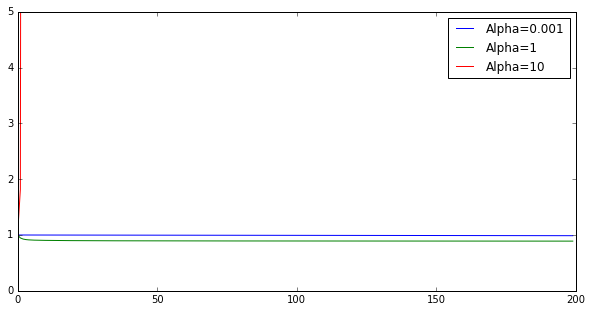

In [94]:
plt.figure(figsize=(10,5))
alphas = [0.001, 1, 10]
_, cost_0 = grad_descent(X_train, y_train, w0, 0.001, 200, 0.0001)
_, cost_1 = grad_descent(X_train, y_train, w0, 1, 200, 0.0001)
_, cost_2 = grad_descent(X_train, y_train, w0, 10, 200, 0.0001)

n_iter_0, n_iter_1, n_iter_2 = len(cost_0), len(cost_1), len(cost_2)
plt.plot(list(range(n_iter_0)), cost_0, label='Alpha=0.001')
plt.plot(list(range(n_iter_1)), cost_1, label='Alpha=1')
plt.plot(list(range(n_iter_2)), cost_2, label='Alpha=10')
plt.ylim((0, 5))
plt.legend()
plt.show()

При $\alpha=10$ алгоритм расходится, что видно по графику. При $\alpha=0.001$ ошибка наименьшая, это заметно с первых итераций.

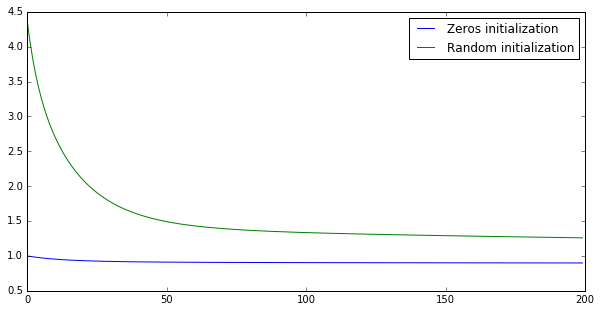

In [95]:
plt.figure(figsize=(10,5))
alpha = 0.1
w1 = np.random.normal(size=len(w0))
_, cost_0 = grad_descent(X_train, y_train, w0, alpha, 200, 0.0001)
_, cost_1 = grad_descent(X_train, y_train, w1, alpha, 200, 0.0001)
n_iter_0, n_iter_1 = len(cost_0), len(cost_1)
plt.plot(list(range(n_iter_0)), cost_0, label='Zeros initialization')
plt.plot(list(range(n_iter_1)), cost_1, label='Random initialization')
plt.legend()
plt.show()

Инициализация параметров нулями показывает лучшую скорость сходимости.

**22. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

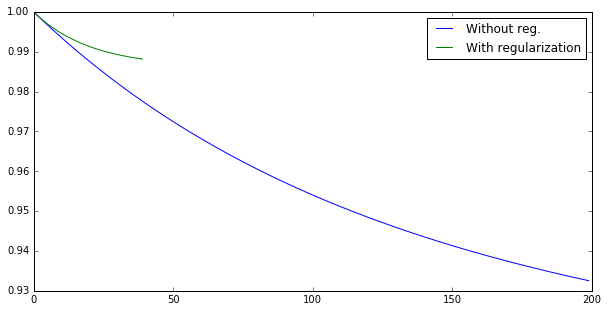

In [96]:
plt.figure(figsize=(10,5))
alpha = 0.01
_, cost_0 = grad_descent(X_train, y_train, w0, alpha, 200, 0.001)
_, cost_1 = grad_descent(X_train, y_train, w0, alpha, 200, 0.001, True)
n_iter_0, n_iter_1 = len(cost_0), len(cost_1)
plt.plot(list(range(n_iter_0)), cost_0, label='Without reg.')
plt.plot(list(range(n_iter_1)), cost_1, label='With regularization')
plt.legend()
plt.show()

Использование регуляризации приводит к более быстрой скорости сходимости. На графике выше видно, что с регуляризацией метод сходится за менее 50 итераций, а методу без регуляризации не хватило и 200 итераций. Вероятно, что это связано со значениями коэффициентов (без регуляризации разброс коэффициентов очень большой: ~ от  $-10^{10}$ до $10^{10}$)

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**23. (1 доп. балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [461]:
def sgd(X, y, step_size, max_iter, eps, tau, is_reg=False):
    n, m = X.shape
    w0 = np.zeros(m)
    Y = np.array(y)
    cost_list = []
    func = get_func
    if is_reg:
        func = get_reg_func
    Q = func(w0, X, y)
    
    for i in range(max_iter):
        ind = np.random.randint(n)
        if not is_reg:
            cost_reg = 0
            grad_reg = 0
        else:
            cost_reg = (np.linalg.norm(w0))**2
            grad_reg = 2 * w0
    
        # Вычисление потери
        #
        cost = ((Y[ind] - np.dot(w0, X.iloc[ind])) / Y[ind])**2 + tau * cost_reg
        Q = (1 - tau) * Q + tau * cost
        cost_list.append(Q)
        # Вычисление градиента
        #
        grad = -2 * X.iloc[ind] * (Y[ind] - np.dot(w0, X.iloc[ind])) / Y[ind]**2 + tau * grad_reg
        # Корректировка весов
        #
        w_prev = w0
        w0 = w0 - step_size * grad
        # Критерий останова
        #
        if (np.linalg.norm(w_prev - w0) < eps):
            break
        
    return w0, cost_list

**24. (0.5 доп. балла)** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

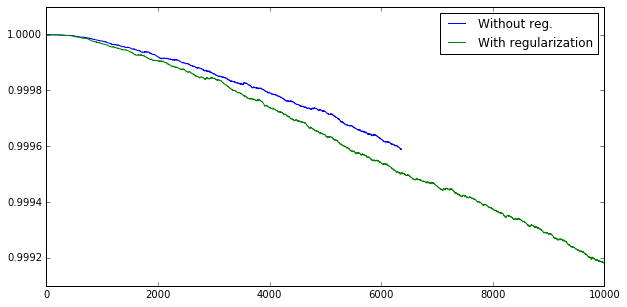

In [492]:
plt.figure(figsize=(10,5))
alpha = 0.001
eps = 0.00001
tau = 0.000001
_, cost_0 = sgd(X_train, y_train, alpha, 10000, eps, tau)
_, cost_1 = sgd(X_train, y_train, alpha, 10000, eps, tau, True)
n_iter_0, n_iter_1 = len(cost_0), len(cost_1)
plt.plot(list(range(len(cost_0))), cost_0, label='Without reg.')
plt.plot(list(range(len(cost_1))), cost_1, label='With regularization')
plt.legend()
plt.show()

После небольшого числа экспериментов трудно сказать какой алгоритм сходится быстрее.

**25. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?

In [504]:
len(np.array(y_test))

19022

In [505]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("MSPE на контроле: %f" % np.mean(((y_test - y_pred) / y_test)**2))
print("Коэффициент дерминации: %f" %r2_score(y_test, y_pred))
print("Среднеквадратичная ошибка: %f" %mean_squared_error(y_test, y_pred))

MSPE на контроле: 70666410096134840320.000000
Коэффициент дерминации: -6515249304633327616.000000
Среднеквадратичная ошибка: 8765547251655355924480.000000


Здесь вы можете поделиться своими мыслями по поводу этого задания.

Ошибки получаются космическими. Пока не знаю как это можно объяснить.

А здесь — вставить вашу любимую картинку.

<img src = "http://bluehillresearch.com/wp-content/uploads/2014/10/Data_Science_VD.png">